In [18]:
import blackjackSim as bjs
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uuid
import warnings
import random
from sklearn import svm

In [13]:
hitbutton = widgets.Button(description = "Hit",
                          disabled = False, 
                          button_style = '',
                          tooltip = "Hit",
                          icon = "hand-fist")

def hbc(b):
    clear_output()
    display(hitbutton)
    display(staybutton)
    display(predictbutton)
    game.hit()
    
hitbutton.on_click(hbc) #runs hbc(hitbutton) when you click the hit button

staybutton = widgets.Button(description = "Stand",
                          disabled = False, 
                          button_style = '',
                          tooltip = "Stand",
                          icon = "hand")

def sbc(b):
    clear_output()
    display(hitbutton)
    display(staybutton)
    display(predictbutton)
    game.stay()
    
staybutton.on_click(sbc) #runs sbc(staybutton) when you click the stay button

predictbutton = widgets.Button(description = "Predict",
                          disabled = False, 
                          button_style = '',
                          tooltip = "What should I do?",
                          icon = "hand")

def pbc(b):
    feat = game.get_features()
    pred = model.predict(feat)[0,0]
    if pred > 0.5:
        print("You should hit")
    else:
        print("You should stay")
        
predictbutton.on_click(pbc)

In [12]:
model.predict(game.get_features())[0,0]

0.32484436

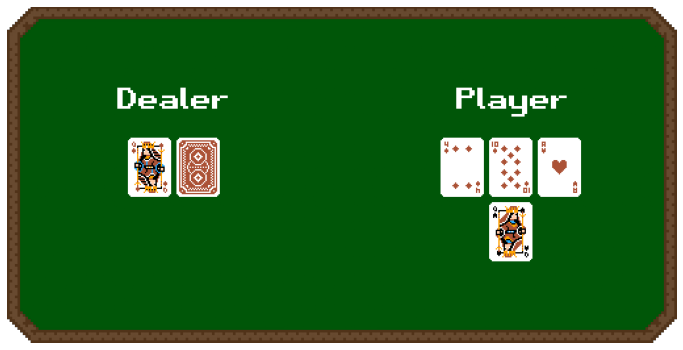

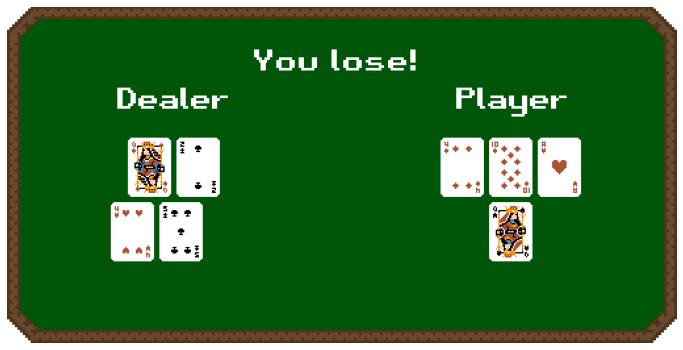

In [15]:
game = bjs.Blackjack(draw = True)

display(hitbutton)
display(staybutton)
display(predictbutton)

In [5]:
game.aces()

0

In [4]:
import random

def sim_winrate(threshold): #simulation loop as a function of how often the player stays
    hit_threshold = threshold

    n_wins = 0
    iterations = 30000
    win = []
    aces = []
    points = []
    dealer_card = []

    hit = []
    round_ = []
    game_number = []

    current_game = 1
    instant_gameovers = 0
    for i in range(iterations):
        game = bjs.Blackjack()
        current_round = 0
        if game.is_active == False:
            instant_gameovers += 1
            current_game += 1
            continue
        else:
            while game.is_active == True:
                if game.point() < 11:
                    game.hit()
                    hit.append(1)
                    current_round += 1
                elif random.random() > hit_threshold:
                    game.hit()
                    hit.append(1)
                    current_round += 1
                else:
                    game.stay()
                    hit.append(0)
                    current_round += 1

                points.append(game.point())
                dealer_card.append(game.dealer[0])
                aces.append(game.aces())
                round_.append(current_round)

            for j in range(current_round): #assigning win and game labels to all turns
                game_number.append(current_game)
                win.append(game.player_win)
            
            if game.player_win == True:
                n_wins += 1
            
            current_game += 1
    
    return n_wins/iterations


In [7]:
thresholds = []
winrates = []
for i in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.00]: #
    winrate = sim_winrate(i)
    print(f"Threshold: {i}, Winrate: {winrate}")
    thresholds.append(i)
    winrates.append(winrate)

Threshold: 0.0, Winrate: 0.0
Threshold: 0.1, Winrate: 0.0219
Threshold: 0.2, Winrate: 0.0434
Threshold: 0.3, Winrate: 0.058133333333333335
Threshold: 0.4, Winrate: 0.0687
Threshold: 0.5, Winrate: 0.079
Threshold: 0.6, Winrate: 0.08263333333333334
Threshold: 0.7, Winrate: 0.08786666666666666
Threshold: 0.8, Winrate: 0.0878
Threshold: 0.9, Winrate: 0.09216666666666666
Threshold: 0.95, Winrate: 0.0889
Threshold: 0.99, Winrate: 0.0882
Threshold: 1.0, Winrate: 0.08933333333333333


Text(0.5, 0, 'Rate of staying')

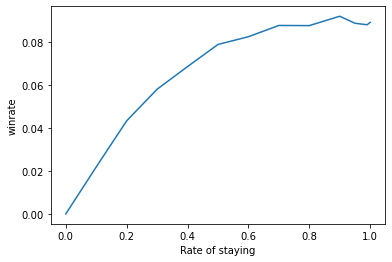

In [8]:
plt.plot(thresholds, winrates)
plt.ylabel("winrate")
plt.xlabel("Rate of staying")

In [2]:
hit_threshold = 0.7 #if random.random() is above this number, hit
n_wins = 0 #number of wins
iterations = 100000 #number of games to simulate
#Simulation output
win = [] # Win(1), Loss(0)
aces = [] # Number of aces in player's hand
points = [] # Number of points the player's hand is worth
dealer_card = [] # Value/rank of dealer's face-up card

hit = [] # Whether the player did hit or stay
round_ = [] # Which round of the game it is, where the first round of the game is 1
game_number = [] # Number assigned to that game

current_game = 1 # Number assigned to that game
instant_gameovers = 0 # How many times the game is won just from the dealing of cards, e.g. player or dealer receives 21
for i in range(iterations):
    game = bjs.Blackjack() #initialize game
    current_round = 0
    if game.is_active == False: # Only activated in case of an instant game over
        instant_gameovers += 1
        current_game += 1
        continue
    else:
        while game.is_active == True: # While the game still hasn't ended:
            
            #Add features to lists
            points.append(game.point())
            dealer_card.append(game.dealer[0])
            aces.append(game.aces())
            round_.append(current_round)
            
            if game.point() < 11: # Always hit if you have 10 points or less, it's impossible to lose
                game.hit()
                hit.append(1)
                current_round += 1
            elif random.random() > hit_threshold: # Hit if above threshold
                game.hit()
                hit.append(1)
                current_round += 1
            else: # Stay if below threshold
                game.stay()
                hit.append(0)
                current_round += 1

            

        for j in range(current_round): #assigning win and game labels to all turns
            game_number.append(current_game)
            win.append(game.player_win)

        if game.player_win == True:
            n_wins += 1

        current_game += 1

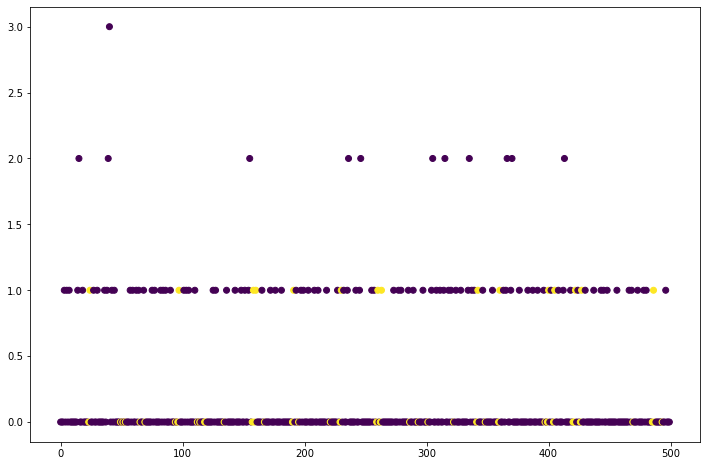

In [7]:
#Coloring graph to visualize winning games and rounds
n_turns = 500 #number of turns to graph
win_colors = []
for i in win:
    win_colors.append(int(i))

plt.figure(figsize = (12,8))
plt.scatter(np.arange(len(round_))[:n_turns], round_[:n_turns], c = win_colors[:n_turns])

In [8]:
label = [] #list of labels. If 1, then either a hit resulted in a win, or a stay resulted in a loss. If 0, then either a
           #stay resulted in a win, or a hit resulted in a loss. This is a big assumption, and how accurate it is will
           #determine how well the model can play blackjack
for i in range(len(win)):
    if win[i] == 0:
        if hit[i] == 0:
            label.append(1) #should've hit
        elif hit[i] == 1:
            label.append(0) #should've stayed
    elif win[i] == 1:
        label.append(hit[i]) #did the right thing, so just add that

In [9]:
np.array(dealer_card)[:,1]

array(['Ace', '4', 'King', ..., 'Ace', '7', '3'], dtype='<U8')

In [10]:
import pandas as pd
data = pd.DataFrame()
data["label"] = label
data["win"] = win
data["points"] = points
data["aces"] = aces


data["dealer card"] = np.array(dealer_card)[:,1]
data["dealer card"] = data["dealer card"].replace({"Jack":10, "Queen":10, "King":10, "Ace":11}) #Change names to numbers
data["dealer card"] = pd.to_numeric(data["dealer card"]) #Change series dtype from string to a numeric 
data["round"] = round_
data["game number"] = game_number

In [15]:
win_data["points"].unique()

array([14, 19, 18, 11, 20, 10, 13, 12,  9,  5, 15, 17,  6, 16,  7,  4,  8])

# Neural network

In [40]:
win_data = data[ data["win"] == True]
big_loss_data = data[ data["win"] == False]

In [57]:
test_rounds = len(win_data) # 50% test size for win data
loss_proportion = test_rounds/len(big_loss_data) # this portion test size for loss data

#Split winning and losing data

In [58]:
loss_proportion

0.11985141688632078

In [11]:
def sample_groupby_games(df, frac, return_complement = False):
    groupby = df.groupby("game number")
    main_df = pd.DataFrame()
    comp_df = pd.DataFrame() #Everything from original df not in main_df
    for i in groupby:
        if random.random() < frac:
            a = i[1]
            main_df = pd.concat((main_df, a))
        else:
            if return_complement == True:
                a = i[1]
                comp_df = pd.concat((comp_df, a))
    if return_complement == False:
        return main_df
    else:
        return main_df, comp_df

In [60]:
loss_data = sample_groupby_games(big_loss_data, loss_proportion)

In [ ]:
#Generate full data
full_data = pd.concat((win_data, loss_data))

In [16]:
train_data, test_data = sample_groupby_games(full_data, 0.75, return_complement=True)

train_features = train_data[['points', 'aces', 'dealer card', 'round']]
test_features = test_data[['points', 'aces', 'dealer card', 'round']]

train_labels = train_data["label"]
test_labels = test_data["label"]

In [18]:
train_features

,points,aces,dealer card,round
12777,10,0,4,0
12778,15,0,4,1
12779,14,0,10,0
12781,18,0,6,0
12782,14,0,6,0
...,...,...,...,...
25387,11,0,10,0
25388,17,0,10,1
25392,13,0,2,0
12775,9,0,2,0


In [19]:
#retrieve full data
full_data = pd.read_csv("blackjack_data.csv")

In [6]:
full_data

,Unnamed: 0,label,win,points,aces,dealer card,round,game number
0,23,1,True,14,1,5,0,18
1,24,0,True,19,1,5,1,18
2,49,0,True,18,1,5,0,37
3,51,0,True,19,0,10,0,39
4,53,0,True,18,0,2,0,41
...,...,...,...,...,...,...,...,...
25388,119349,1,False,17,0,10,1,99970
25389,119351,0,False,13,0,10,0,99973
25390,119352,1,False,15,0,10,1,99973
25391,119366,1,False,13,0,7,0,99986


In [67]:
# save full data
full_data.to_csv("blackjack_data.csv")

In [20]:
import tensorflow as tf

In [21]:
#create a neural network 
#input layer
x = tf.keras.layers.Input(shape=(4,))
#hidden layer
h = tf.keras.layers.Dense(units=4, activation='relu')(x)
#output layer
y = tf.keras.layers.Dense(units=1, activation='sigmoid')(h)
#create model
model = tf.keras.Model(inputs=x, outputs=y)
#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#train model
model.fit(full_data[['points', 'aces', 'dealer card', 'round']], full_data['label'], epochs=20)

Epoch 1/20
794/794 [==============================] - 2s 2ms/step - loss: 3.0957 - accuracy: 0.4671
Epoch 2/20
794/794 [==============================] - 2s 3ms/step - loss: 0.7545 - accuracy: 0.4412
Epoch 3/20
794/794 [==============================] - 2s 3ms/step - loss: 0.6738 - accuracy: 0.5802
Epoch 4/20
794/794 [==============================] - 2s 3ms/step - loss: 0.6562 - accuracy: 0.6223
Epoch 5/20
794/794 [==============================] - 2s 3ms/step - loss: 0.6430 - accuracy: 0.6501
Epoch 6/20
794/794 [==============================] - 1s 2ms/step - loss: 0.6344 - accuracy: 0.6706
Epoch 7/20
794/794 [==============================] - 2s 2ms/step - loss: 0.6285 - accuracy: 0.6783
Epoch 8/20
794/794 [==============================] - 2s 2ms/step - loss: 0.6214 - accuracy: 0.6943
Epoch 9/20
794/794 [==============================] - 2s 2ms/step - loss: 0.6222 - accuracy: 0.6923
Epoch 10/20
794/794 [==============================] - 2s 2ms/step - loss: 0.6181 - accuracy: 0.6999

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Dropout

In [22]:
model = tf.keras.models.Sequential()
model.add(Dense(16))
model.add(Dense(128))
model.add(Dense(32))
model.add(Dense(8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd')
model.fit(full_data[['points', 'aces', 'dealer card', 'round']], full_data['label'], epochs=200, batch_size=256, verbose=1)

Epoch 1/200
100/100 [==============================] - 1s 3ms/step - loss: 1.6037
Epoch 2/200
100/100 [==============================] - 0s 3ms/step - loss: 0.6784
Epoch 3/200
100/100 [==============================] - 0s 3ms/step - loss: 0.6725
Epoch 4/200
100/100 [==============================] - 0s 2ms/step - loss: 0.6682
Epoch 5/200
100/100 [==============================] - 0s 2ms/step - loss: 0.6637
Epoch 6/200
100/100 [==============================] - 0s 3ms/step - loss: 0.6618
Epoch 7/200
100/100 [==============================] - 0s 2ms/step - loss: 0.6606
Epoch 8/200
100/100 [==============================] - 0s 2ms/step - loss: 0.6578
Epoch 9/200
100/100 [==============================] - 0s 2ms/step - loss: 0.6562
Epoch 10/200
100/100 [==============================] - 0s 2ms/step - loss: 0.6539
Epoch 11/200
100/100 [==============================] - 0s 3ms/step - loss: 0.6522
Epoch 12/200
100/100 [==============================] - 0s 3ms/step - loss: 0.6502
Epoch 13/200


100/100 [==============================] - 0s 4ms/step - loss: 0.6401
Epoch 100/200
100/100 [==============================] - 0s 4ms/step - loss: 0.6377
Epoch 101/200
100/100 [==============================] - 0s 3ms/step - loss: 0.6389
Epoch 102/200
100/100 [==============================] - 0s 3ms/step - loss: 0.6384
Epoch 103/200
100/100 [==============================] - 0s 4ms/step - loss: 0.6364
Epoch 104/200
100/100 [==============================] - 0s 4ms/step - loss: 0.6367
Epoch 105/200
100/100 [==============================] - 0s 4ms/step - loss: 0.6399
Epoch 106/200
100/100 [==============================] - 0s 3ms/step - loss: 0.6387
Epoch 107/200
100/100 [==============================] - 0s 4ms/step - loss: 0.6405
Epoch 108/200
100/100 [==============================] - 0s 4ms/step - loss: 0.6428
Epoch 109/200
100/100 [==============================] - 0s 3ms/step - loss: 0.6384
Epoch 110/200
100/100 [==============================] - 0s 4ms/step - loss: 0.6374
Epoch 

100/100 [==============================] - 0s 2ms/step - loss: 0.6411
Epoch 197/200
100/100 [==============================] - 0s 3ms/step - loss: 0.6392
Epoch 198/200
100/100 [==============================] - 0s 2ms/step - loss: 0.6388
Epoch 199/200
100/100 [==============================] - 0s 3ms/step - loss: 0.6358
Epoch 200/200
100/100 [==============================] - 0s 3ms/step - loss: 0.6372


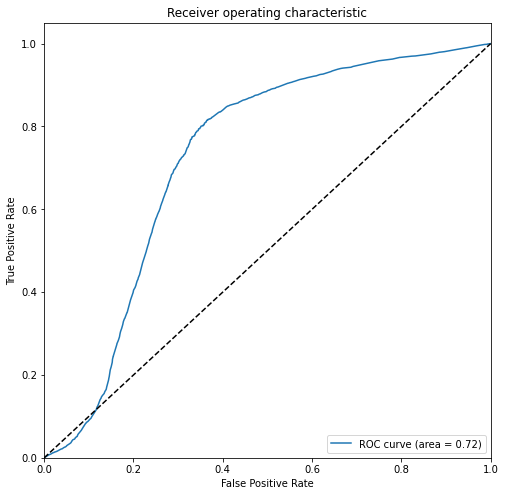

In [17]:
#plot ROCCurve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(full_data['label'], model.predict(full_data[['points', 'aces', 'dealer card', 'round']]))
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(8,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
list(test_features.loc[1])

[19, 1, 5, 1]

In [30]:
model.predict([list(test_features.loc[1])])[0,0]

0.38968366

In [ ]:
import time
start = time.time()
lin_SVC = svm.SVC(kernel = "linear", C=10)
result = lin_SVC.fit(train_features, train_labels)
print(f"Runtime: {time.time()-start}")

In [66]:
result.score(test_features, test_labels)

0.6848097317529632

In [20]:
test_features.loc[1]

points         19
aces            1
dealer card     5
round           1
Name: 1, dtype: int64

In [22]:
samp = wd_features.loc[23:25]
result.predict(samp)

array([1, 0])

In [40]:
type(result)

sklearn.svm._classes.SVC

# Alex's code

In [13]:
#We will create a function that will run the game x amount of tumes and will record the results
def sim_game(x, h):
    #Initialize lists
    hit_threshold = h
    n_wins = 0
    win = []
    points = []
    aces = []
    dealer_card = []
    hit = []
    round_ = []
    game_number = []
    
    current_game = 1
    instant_gameovers = 0
    for i in range(x):
        game = bjs.Blackjack()
        current_round = 0
        if game.is_active == False:
            instant_gameovers += 1
            current_game += 1
            
            continue
        else:
            while game.is_active == True:
                if game.point() < 11:
                    game.hit()
                    hit.append(1)
                    current_round += 1
                elif random.random() > hit_threshold:
                    game.hit()
                    hit.append(1)
                    current_round += 1
                else:
                    game.stay()
                    hit.append(0)
                    current_round += 1

                #Add features to lists
                points.append(game.point())
                dealer_card.append(game.dealer[0])
                aces.append(game.aces())
                round_.append(current_round)
                

            for j in range(current_round):
                game_number.append(current_game)
                win.append(game.player_win)

            if game.player_win == True:
                n_wins += 1

            current_game += 1

         #using these features generate a dataframe
    label = []
    for i in range(len(win)):
        if win[i] == 0:
            if hit[i] == 0:
                label.append(1) #should've hit
            elif hit[i] == 1:
                label.append(0) #should've stayed
        elif win[i] == 1:
            label.append(hit[i]) #did the right thing, so just add that
    data = pd.DataFrame()
    data["game number"] = game_number
    data["round"] = round_
    data["label"] = label
    data["win"] = win
    data["points"] = points
    data["aces"] = aces
    data["dealer card"] = np.array(dealer_card)[:,1]
    data["dealer card"] = data["dealer card"].replace({"Jack":10, "Queen":10, "King":10, "Ace":11})
    data["dealer card"] = pd.to_numeric(data["dealer card"])
    data['game_id'] = np.zeros(len(data))
    #assign a unique id based on the game number using uuid
    for i in range(len(data)):
        data['game_id'][i] = uuid.uuid4()
        if i != 0:
            if data["game number"][i] == data["game number"][i-1]:
                data['game_id'][i] = data['game_id'][i-1]
    

    return data

    

In [12]:
def rand_win_lose(itter, thresh):
    df = sim_game(itter, thresh)
    df_win = df[df["win"] == True]
    df_lose = df[df["win"] == False]
    new_df = pd.concat([df_win.groupby("game number")['label', 'win', 'points', 'aces', 'dealer card', 'round', 'game number', 'game_id']
        .apply(pd.Series.sample, frac=.8).reset_index(drop=True), 
        df_lose.groupby("game number")['label', 'win', 'points', 'aces', 'dealer card', 'round', 'game number', 'game_id']
        .apply(pd.Series.sample, frac=.2).reset_index(drop=True)])
    #sort the dataframe by game number and points
    #new_df.sort_values(by = ["points"]).groupby("game_id")
    
    
    return new_df

In [13]:
def chance_return(x, chance):
    for i in x:
        if random.random() < chance:
            return i
        else:
            pass

In [23]:
win_data

,label,win,points,aces,dealer card,round,game number
30,0,True,19,0,8,1,27
38,1,True,20,0,5,1,35
39,0,True,20,0,5,2,35
56,1,True,14,0,10,1,47
57,1,True,21,0,10,2,47
...,...,...,...,...,...,...,...
122224,1,True,19,1,11,2,99967
122225,0,True,19,1,11,3,99967
122235,1,True,19,0,10,1,99974
122236,0,True,19,0,10,2,99974


In [7]:
all_df = pd.DataFrame()
for i in range(100):
    warnings.filterwarnings(action='ignore')
    
    new_df = rand_win_lose(100, 0.5)
    #concat all df with new df
    all_df = pd.concat([all_df, new_df])
   
    #update the progress bar
    clear_output()
    print("Progress: ", i+1, "out of 100")

Progress:  1 out of 100
Progress:  2 out of 100
Progress:  3 out of 100
Progress:  4 out of 100
Progress:  5 out of 100
Progress:  6 out of 100
Progress:  7 out of 100
Progress:  8 out of 100
Progress:  9 out of 100
Progress:  10 out of 100
Progress:  11 out of 100
Progress:  12 out of 100
Progress:  13 out of 100
Progress:  14 out of 100
Progress:  15 out of 100
Progress:  16 out of 100
Progress:  17 out of 100
Progress:  18 out of 100
Progress:  19 out of 100
Progress:  20 out of 100
Progress:  21 out of 100
Progress:  22 out of 100
Progress:  23 out of 100
Progress:  24 out of 100
Progress:  25 out of 100
Progress:  26 out of 100
Progress:  27 out of 100
Progress:  28 out of 100
Progress:  29 out of 100
Progress:  30 out of 100
Progress:  31 out of 100
Progress:  32 out of 100
Progress:  33 out of 100
Progress:  34 out of 100
Progress:  35 out of 100
Progress:  36 out of 100
Progress:  37 out of 100
Progress:  38 out of 100
Progress:  39 out of 100
Progress:  40 out of 100
Progress:

In [8]:
all_df

,label,win,points,aces,dealer card,round,game number,game_id
0,0,True,20,0,3,1,12,00b2cd5d-3de5-4769-99b2-557c79316738
1,0,True,20,0,2,1,15,4e20e675-a379-47d7-b170-ce8e5c24e2cc
2,0,True,20,0,3,1,23,0ff5a986-5d54-45f2-90dd-8ba86a53c0c6
3,1,True,21,0,4,1,26,b4e189b2-7d45-4e72-8423-a49d2085446d
4,0,True,21,0,4,2,26,b4e189b2-7d45-4e72-8423-a49d2085446d
...,...,...,...,...,...,...,...,...
1,1,False,18,1,9,4,41,e186f301-2094-4d24-8fa4-a6744696d2e2
2,0,False,20,0,2,2,43,322dec13-9a1c-47be-a785-a20b34ad653a
3,1,False,18,1,10,4,66,34b5e943-9f9a-493c-bb25-2f03ddee4e30
4,0,False,10,0,10,1,75,9d178e21-2059-4ad6-9bc8-a235e04d3b1c
